In [127]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [128]:
# load df, convert year to date/time and view
df = pd.read_csv("540_project_df.csv", parse_dates=['year'])
df.head()

,race,sex,year,salary_no,num_none,std_none,salary_hs,num_hs,std_hs,salary_2yr,num_2yr,std_2yr,salary_4yr,num_4yr,std_4yr,salary_6yr,num_6yr,std_6yr
0,white,Male,2018-01-01,32458.0,6098.00,838.00,47199.0,19815.00,625.00,54482.0,18546.00,847.00,87842.0,16080.00,1263.00,125533.0,8516.00,2358.00
1,white,Male,2017-01-01,32096.0,6277.00,649.00,46284.0,19933.00,528.00,51974.0,18724.00,538.00,83478.0,15913.00,837.00,122160.0,8373.00,1892.00
2,white,Male,2016-01-01,33153.0,6255.00,883.00,45390.0,19941.00,546.00,50063.0,18951.00,510.00,84069.0,15136.00,961.00,116854.0,8211.00,1734.00
3,white,Male,2015-01-01,31336.0,6755.00,748.00,43711.0,19807.00,472.00,47900.0,18905.00,454.00,82495.0,14884.00,1005.00,115094.0,8257.00,1708.00
4,white,Male,2014-01-01,30342.0,6858.00,780.00,41492.0,19815.00,381.00,48405.0,18518.00,562.00,78348.0,14409.00,886.00,112351.0,7864.00,1706.00


In [129]:
# Only show year from datetime
df['year'] = pd.DatetimeIndex(df['year']).year

In [130]:
# subset features
shortdf = df[['race', 'sex', 'year', 'salary_no', 'salary_hs', 'salary_2yr',
                 'salary_4yr', 'salary_6yr']]
shortdf

,race,sex,year,salary_no,salary_hs,salary_2yr,salary_4yr,salary_6yr
0,white,Male,2018,32458.0,47199.0,54482.0,87842.0,125533.0
1,white,Male,2017,32096.0,46284.0,51974.0,83478.0,122160.0
2,white,Male,2016,33153.0,45390.0,50063.0,84069.0,116854.0
3,white,Male,2015,31336.0,43711.0,47900.0,82495.0,115094.0
4,white,Male,2014,30342.0,41492.0,48405.0,78348.0,112351.0
...,...,...,...,...,...,...,...,...
289,Hispanic,Female,1979,4675.0,6708.0,7069.0,9168.0,13313.0
290,Hispanic,Female,1978,4135.0,5834.0,6686.0,9684.0,10908.0
291,Hispanic,Female,1977,3707.0,5466.0,5588.0,9082.0,10569.0
292,Hispanic,Female,1976,3537.0,5124.0,5075.0,6884.0,9218.0


In [132]:
# rename features
shortdf = shortdf.rename(columns={"salary_no": "none", "salary_hs": "high_school",
                        "salary_2yr": "associates", "salary_4yr": "bachelors",
                        "salary_6yr": "professional"})


In [133]:
# check for duplicates
duplicate = shortdf[shortdf.duplicated(keep = 'last')]
print('There are',len(duplicate),'duplicated rows')

There are 0 duplicated rows


In [134]:
# check for null values
shortdf.isnull().values.any()

False

In [135]:
# group subset data by annual mean incomes
yr_degree = shortdf.groupby('year').mean()
yr_degree.head()

,none,high_school,associates,bachelors,professional
year,,,,,
1975,5590.400000,7325.400000,7611.200000,10665.200000,13872.8
1976,6060.400000,7906.200000,7894.400000,11407.400000,14976.4
1977,6402.000000,8633.000000,8793.200000,12704.000000,15945.4
1978,7045.600000,9270.600000,9871.800000,14181.400000,17146.4
1979,7081.666667,9432.833333,10240.333333,14477.833333,18422.5


In [138]:
# index by year
shortdf.set_index('year')
shortdf.dtypes

race             object
sex              object
year              int64
none            float64
high_school     float64
associates      float64
bachelors       float64
professional    float64
dtype: object

In [139]:
# connect to db and create sql table from existing df
import sqlite3
conn = sqlite3.connect("DSC540.db")
shortdf.to_sql("income", conn, if_exists="replace", index=False)

In [140]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [141]:
# convert website html to dataframe
infl_df = pd.read_html('https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/')[0]
infl_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annual,Percent Change,Percent Change
1,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0


In [142]:
# drop first index
infl_df = infl_df.drop([infl_df.index[0]]) 
infl_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0
5,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,12.6,7.9


In [143]:
# copy row index 0 to column headers
infl_df.columns = infl_df.iloc[0]
# delete row index 0
infl_df = infl_df.drop(infl_df.index[0])
infl_df.head()

1,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0
5,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,12.6,7.9
6,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.8,18.1,17.4


In [144]:
# convert objects to numeric
infl_df['Year'] = pd.to_numeric(infl_df['Year'])
infl_df['Avg'] = pd.to_numeric(infl_df['Avg'])

In [145]:
# filter matching years only
infl_df = infl_df.loc[(infl_df['Year'] >= 1975) & (infl_df['Year'] <= 2018)]

In [146]:
# only keep year and avg cost living
short_infl_df = infl_df[['Year','Avg']]

In [147]:
# index by year
short_infl_df.set_index('Year')
short_infl_df = short_infl_df.rename(columns={"Year": "year"})

In [148]:
short_infl_df = short_infl_df.rename(columns={"Avg": "cost_living"})

In [149]:
# convert pandas dataframe to sql table
short_infl_df.to_sql("inflation", conn, if_exists="replace", index=False)

In [30]:
# import information from BLS API
# Only allowed 10 years of data at a time
import bls
api1 = bls.get_series('CUUR0000SEEB01', 1978, 1987)
api2 = bls.get_series('CUUR0000SEEB01', 1988, 1997)
api3 = bls.get_series('CUUR0000SEEB01', 1998, 2007)
api4 = bls.get_series('CUUR0000SEEB01', 2008, 2017)
api5 = bls.get_series('CUUR0000SEEB01', 2018, 2018)

In [174]:
# merge each decade of data
api_df = api1.append([api2, api3, api4, api5])

In [175]:
# create dataframe
api_df = api_df.to_frame()
api_df = api_df.reset_index()

In [262]:
api_df['date'].dtype

period[M]

In [263]:
# check column headers
for col in api_df.columns: 
    print(col) 

date
CUUR0000SEEB01


In [264]:
# group by year
ave_api_df = api_df.set_index('date').groupby(pd.Grouper(freq='a')).mean().dropna(how='all')

In [265]:
# convert period type to timestamp
# rename columns
ave_api_df = ave_api_df.to_timestamp()
ave_api_df = ave_api_df.reset_index()
ave_api_df = ave_api_df.rename(columns={'date': 'year', 'CUUR0000SEEB01': 'tuition'})
ave_api_df

,year,tuition
0,1978-01-01,59.908333
1,1979-01-01,64.666667
2,1980-01-01,70.833333
3,1981-01-01,79.625000
4,1982-01-01,90.325000
5,1983-01-01,99.725000
6,1984-01-01,109.941667
7,1985-01-01,119.925000
8,1986-01-01,129.633333
9,1987-01-01,139.383333


In [266]:
# Only show year
ave_api_df['year'] = pd.DatetimeIndex(ave_api_df['year']).year

In [181]:
# create sql table from dataframe
ave_api_df.to_sql("cost_tuition", conn, if_exists="replace", index=False)

In [182]:
# check tables for completion
pd.read_sql_query("select * from income;", conn)

,race,sex,year,none,high_school,associates,bachelors,professional
0,white,Male,2018,32458.0,47199.0,54482.0,87842.0,125533.0
1,white,Male,2017,32096.0,46284.0,51974.0,83478.0,122160.0
2,white,Male,2016,33153.0,45390.0,50063.0,84069.0,116854.0
3,white,Male,2015,31336.0,43711.0,47900.0,82495.0,115094.0
4,white,Male,2014,30342.0,41492.0,48405.0,78348.0,112351.0
...,...,...,...,...,...,...,...,...
289,Hispanic,Female,1979,4675.0,6708.0,7069.0,9168.0,13313.0
290,Hispanic,Female,1978,4135.0,5834.0,6686.0,9684.0,10908.0
291,Hispanic,Female,1977,3707.0,5466.0,5588.0,9082.0,10569.0
292,Hispanic,Female,1976,3537.0,5124.0,5075.0,6884.0,9218.0


In [183]:
# check tables for completion
pd.read_sql_query("select * from inflation;", conn)

,year,cost_living
0,1975,53.800
1,1976,56.900
2,1977,60.600
3,1978,65.200
4,1979,72.600
5,1980,82.400
6,1981,90.900
7,1982,96.500
8,1983,99.600
9,1984,103.900


In [184]:
# check tables for completion
pd.read_sql_query("select * from cost_tuition;", conn)

,year,tuition
0,1978,59.908333
1,1979,64.666667
2,1980,70.833333
3,1981,79.625000
4,1982,90.325000
5,1983,99.725000
6,1984,109.941667
7,1985,119.925000
8,1986,129.633333
9,1987,139.383333


In [185]:
# create cursor object
c = conn.cursor()

In [186]:
# merge all 3 tables
c.execute('CREATE TABLE all_data AS SELECT t1.*, t2.cost_living, t3.tuition FROM income t1 \
INNER JOIN inflation t2 ON t1.year = t2.year INNER JOIN cost_tuition t3 ON t1.year = t3.year')      


In [187]:
# check final table for completion
pd.read_sql_query("select * from all_data;", conn)

,race,sex,year,none,high_school,associates,bachelors,professional,cost_living,tuition
0,white,Male,2018,32458.0,47199.0,54482.0,87842.0,125533.0,251.107,841.331833
1,white,Male,2017,32096.0,46284.0,51974.0,83478.0,122160.0,245.120,823.129250
2,white,Male,2016,33153.0,45390.0,50063.0,84069.0,116854.0,240.007,807.000417
3,white,Male,2015,31336.0,43711.0,47900.0,82495.0,115094.0,237.017,785.849750
4,white,Male,2014,30342.0,41492.0,48405.0,78348.0,112351.0,236.736,759.494833
...,...,...,...,...,...,...,...,...,...,...
274,Hispanic,Female,1982,5781.0,8668.0,9896.0,13719.0,15244.0,96.500,90.325000
275,Hispanic,Female,1981,5486.0,8292.0,9483.0,12292.0,15503.0,90.900,79.625000
276,Hispanic,Female,1980,5028.0,6923.0,8808.0,10568.0,14668.0,82.400,70.833333
277,Hispanic,Female,1979,4675.0,6708.0,7069.0,9168.0,13313.0,72.600,64.666667


In [188]:
# create function for converting queries to dataframes
def sql_query(query):
    return pd.read_sql(query, conn)

In [189]:
# query income by year
deg_income = '''
SELECT none, high_school, associates, bachelors, professional, year
FROM all_data
GROUP BY year;
'''
df_di = sql_query(deg_income)

In [190]:
# set index to year
df_di = df_di.set_index('year')

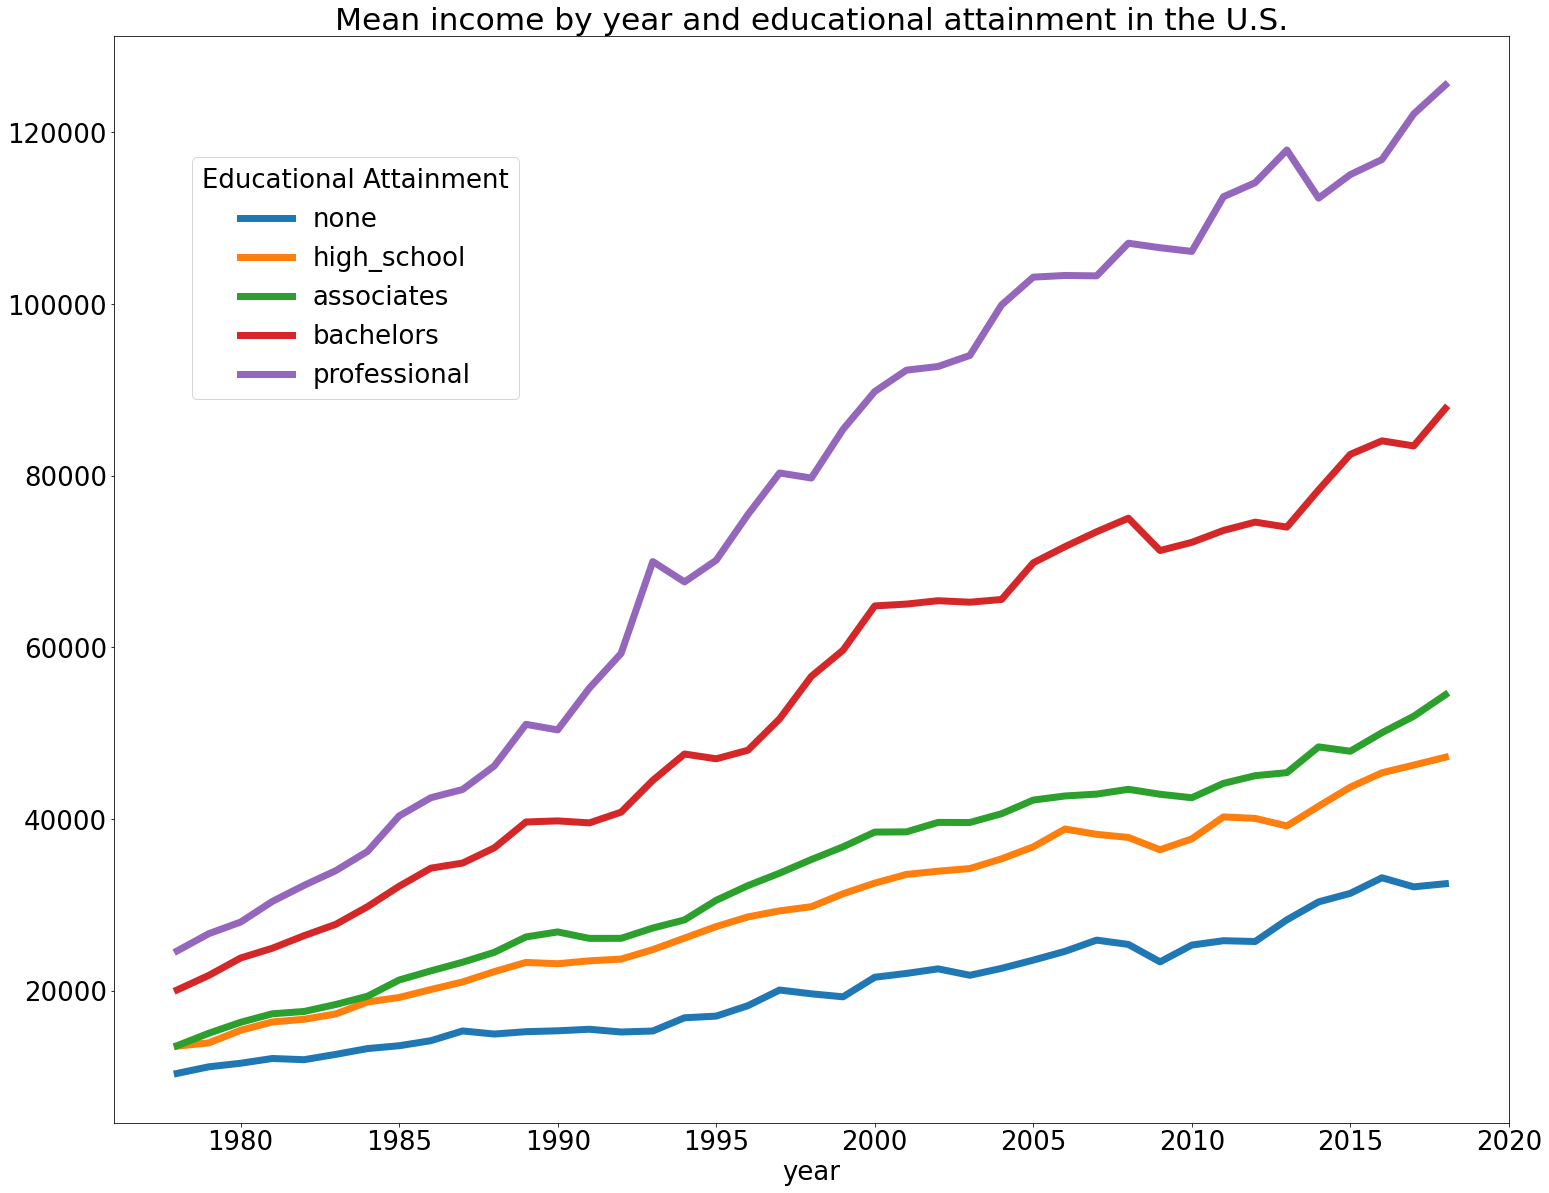

In [268]:
# plot bar graph showing income by education each year
plt.rcParams.update({'font.size': 26})
df_di.plot(kind='line', linewidth=7, figsize=(25,20),
               title='Mean income by year and educational attainment in the U.S.').legend(title='Educational Attainment',
                                                                                          bbox_to_anchor=(0.3, 0.9))


In [192]:
# query cost living to cost tuition
cost_deg = '''
SELECT cost_living, tuition, year
FROM all_data
GROUP BY year;
'''
df_cd = sql_query(cost_deg)

In [193]:
df_cd = df_cd.set_index('year')

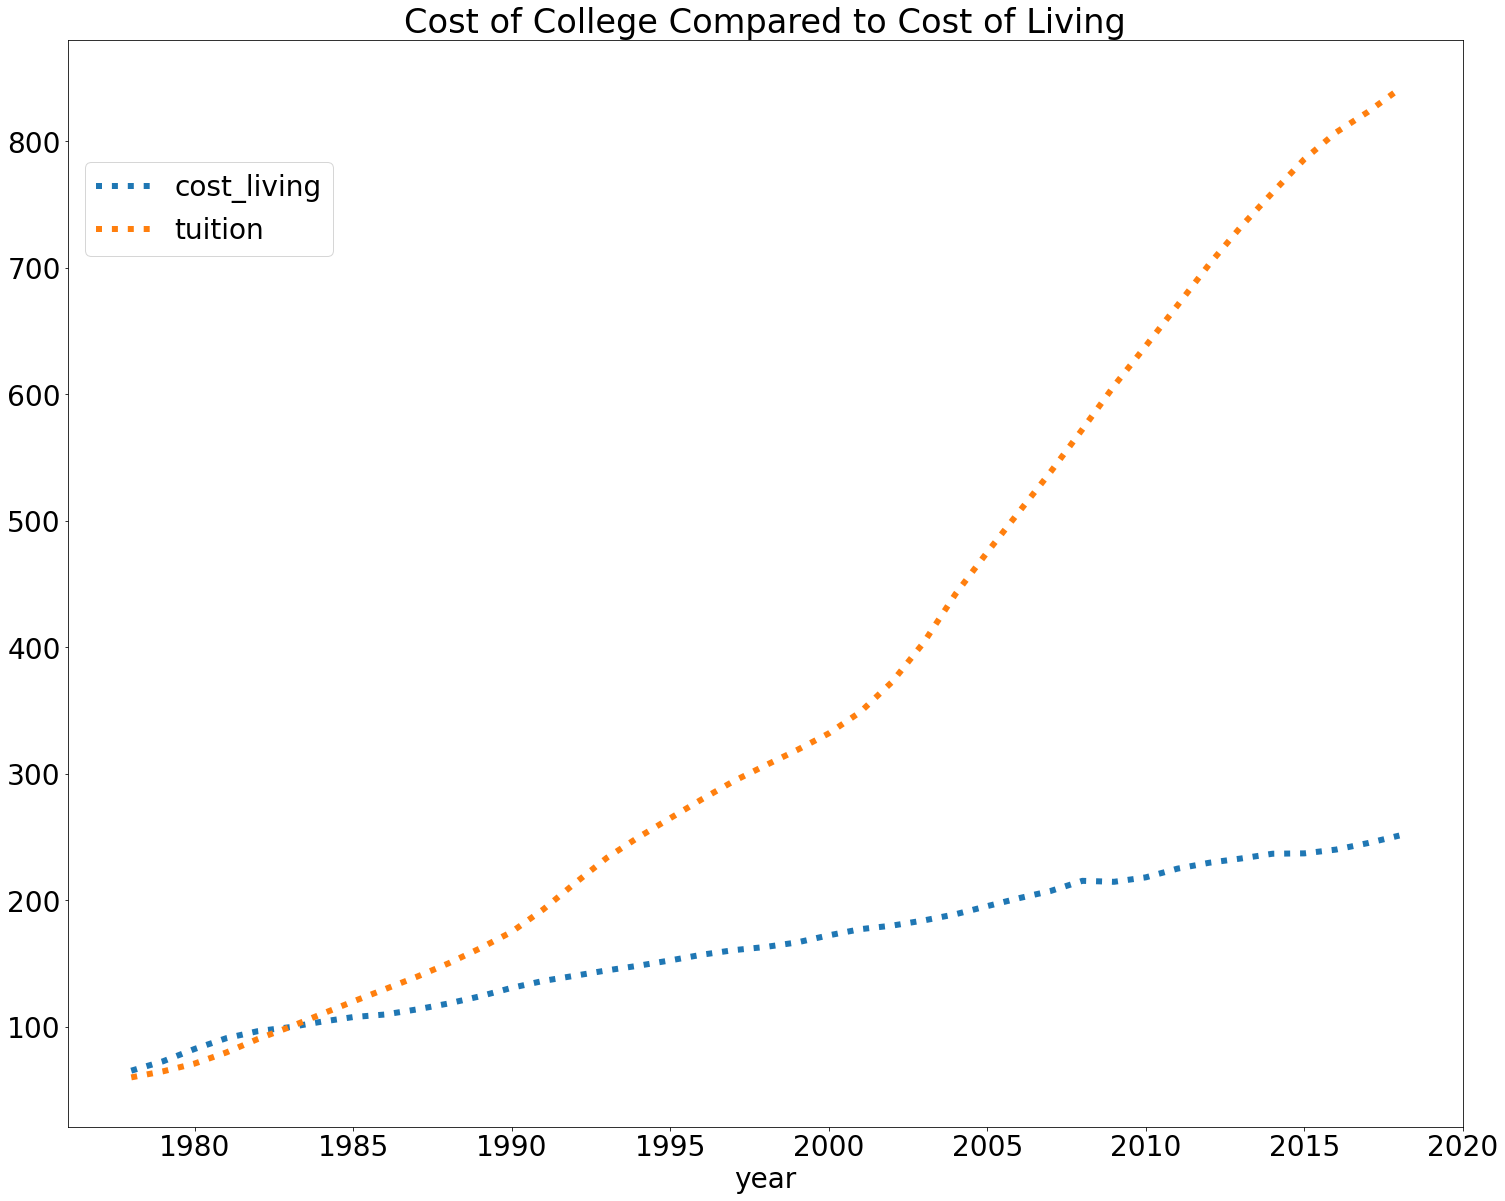

In [203]:
# plot bar graph showing cost living vs cost tuition each year
plt.rcParams.update({'font.size': 28})
df_cd.plot(kind='line', linestyle='dotted', linewidth=6, figsize=(25,20),
               title='Cost of College Compared to Cost of Living').legend(bbox_to_anchor=(0.2, 0.9))


In [195]:
# query income by education and race
inc_race = '''
SELECT none, high_school, associates, bachelors, professional, race
FROM all_data
GROUP BY race;
'''
df_ir = sql_query(inc_race)

In [196]:
df_ir = df_ir.set_index('race')

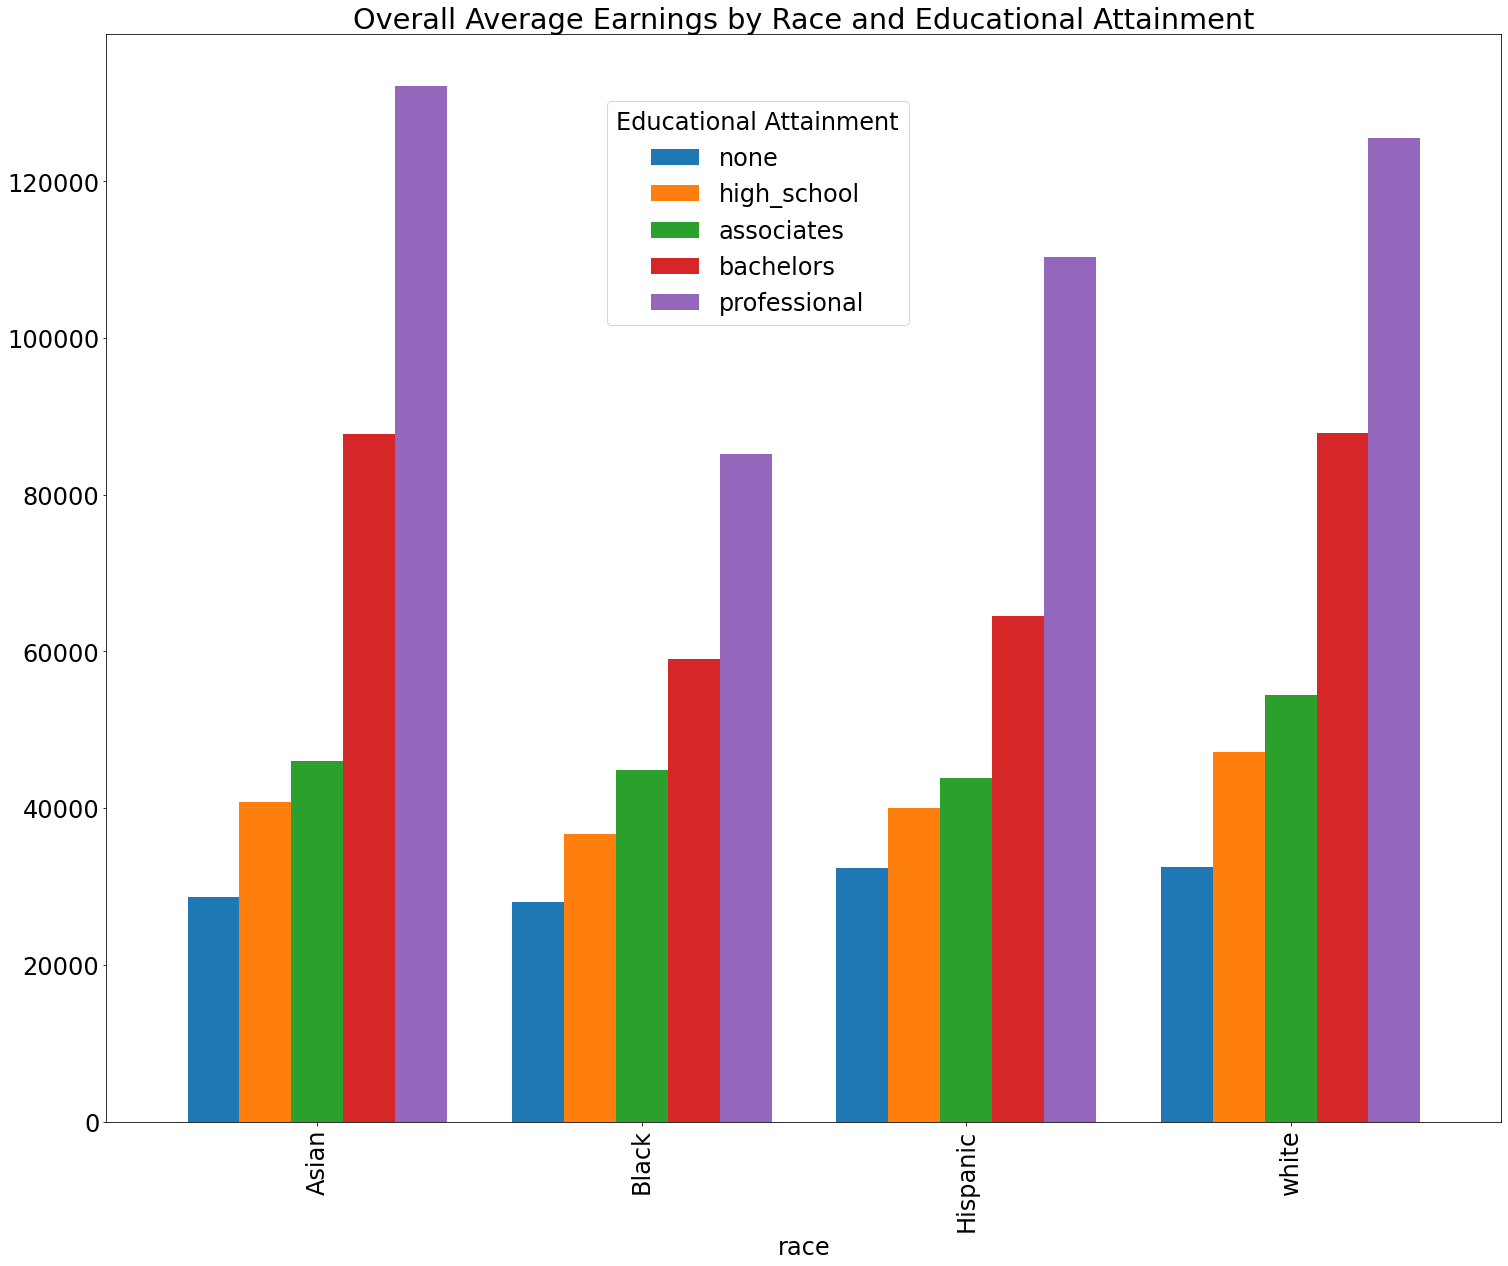

In [201]:
# plot bar graph showing income by education and race
plt.rcParams.update({'font.size': 24})
df_ir.plot(kind='bar', width=0.8, figsize=(25,20),
               title='Overall Average of Earnings by Race and Educational Attainment').legend(title = 'Educational Attainment',
                                                                          bbox_to_anchor=(0.35, .95))


In [198]:
# query income by sex
inc_sex = '''
SELECT none, high_school, associates, bachelors, professional, sex
FROM all_data
GROUP BY sex;
'''
df_is = sql_query(inc_sex)

In [199]:
df_is = df_is.set_index('sex')

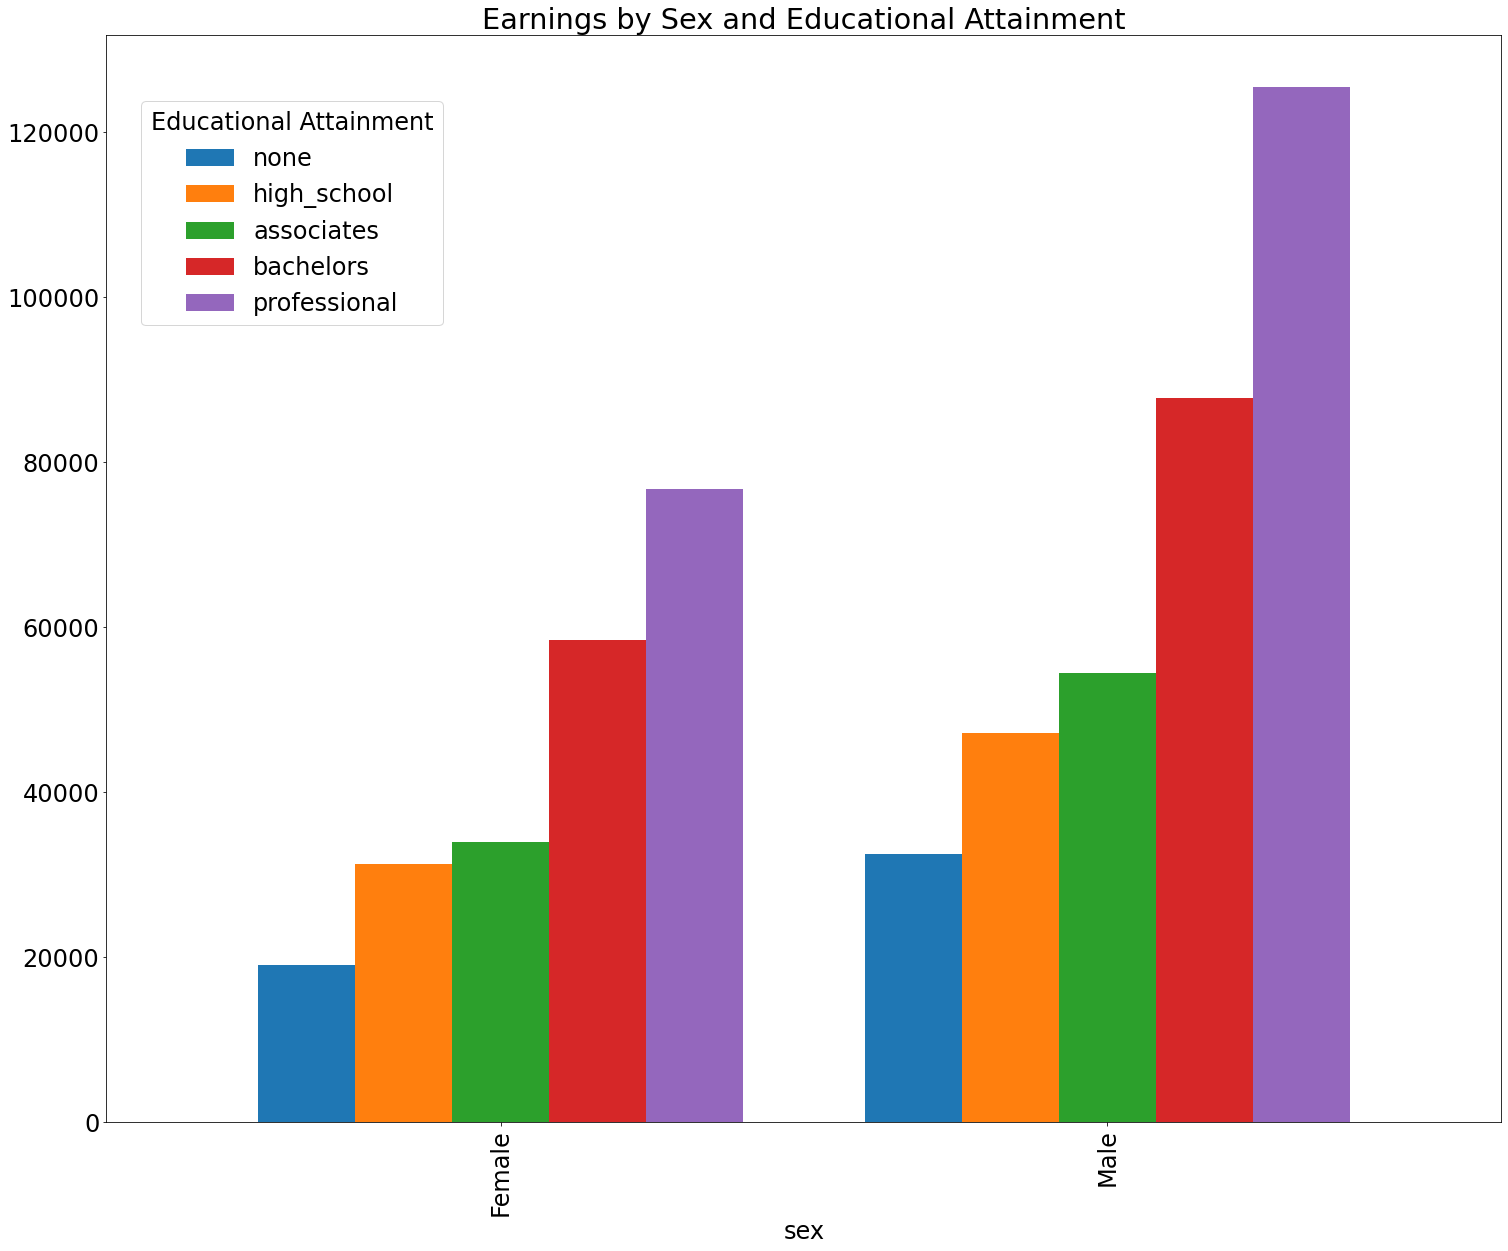

In [200]:
# plot bar graph showing income by education and sex
plt.rcParams.update({'font.size': 24})
df_is.plot(kind='bar', width=0.8, figsize=(25,20),
               title='Overall Average of Earnings by Sex and Educational Attainment').legend(title = 'Educational Attainment',
                                                                          bbox_to_anchor=(0.25, .95))


In [205]:
# prepare dataframe for evaluating cost of degree
deg_cost = '''
SELECT none, high_school, associates, bachelors, professional, tuition, year
FROM all_data
GROUP BY year;
'''
df_dc = sql_query(deg_cost)

In [207]:
df_dc = df_dc.set_index('year')

In [249]:
# create cost of each degree columns
# tuition column is in monthly format
# professional degree assumes 6 years of college

df_dc['cost_associates'] = df_dc['tuition'] * 24
df_dc['cost_bachelors'] = df_dc['tuition'] * 48
df_dc['cost_professional'] = df_dc['tuition'] * 72

In [250]:
# Associates df
a_df = df_dc[['associates', 'cost_associates']]
a_df = a_df.rename(columns={'associates': 'earnings'})

In [251]:
# Bachelors df
b_df = df_dc[['bachelors', 'cost_bachelors']]
b_df = b_df.rename(columns={'bachelors': 'earnings'})

In [252]:
# professional df
p_df = df_dc[['professional', 'cost_professional']]
p_df = p_df.rename(columns={'professional': 'earnings'})

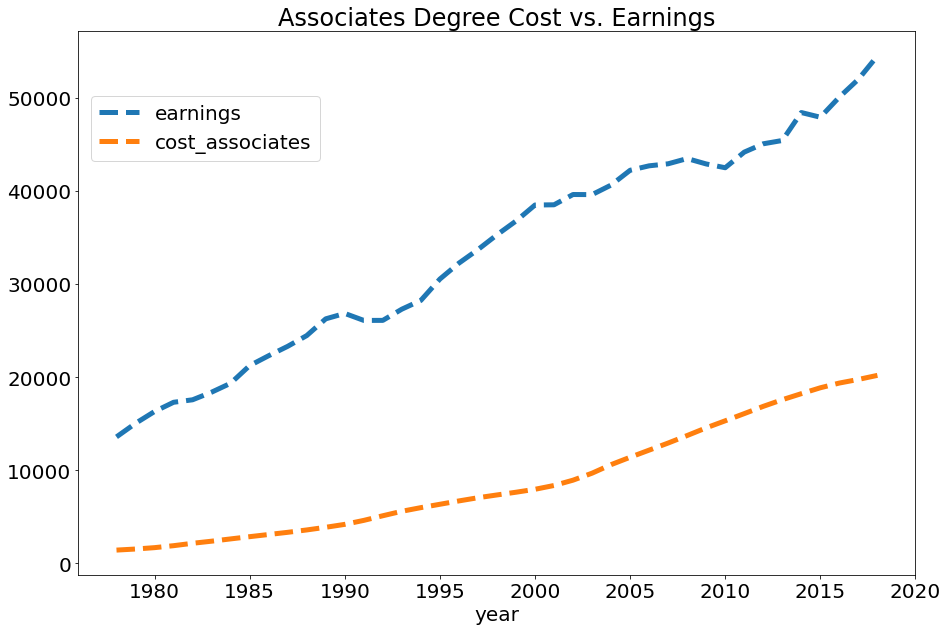

In [253]:
# plot bar graph showing Associate degree cost to earnings each year
plt.rcParams.update({'font.size': 20})
a_df.plot(kind='line', linestyle='dashed', linewidth=5, figsize=(15,10),
               title='Associates Degree Cost vs. Earnings').legend(bbox_to_anchor=(0.3, 0.9))


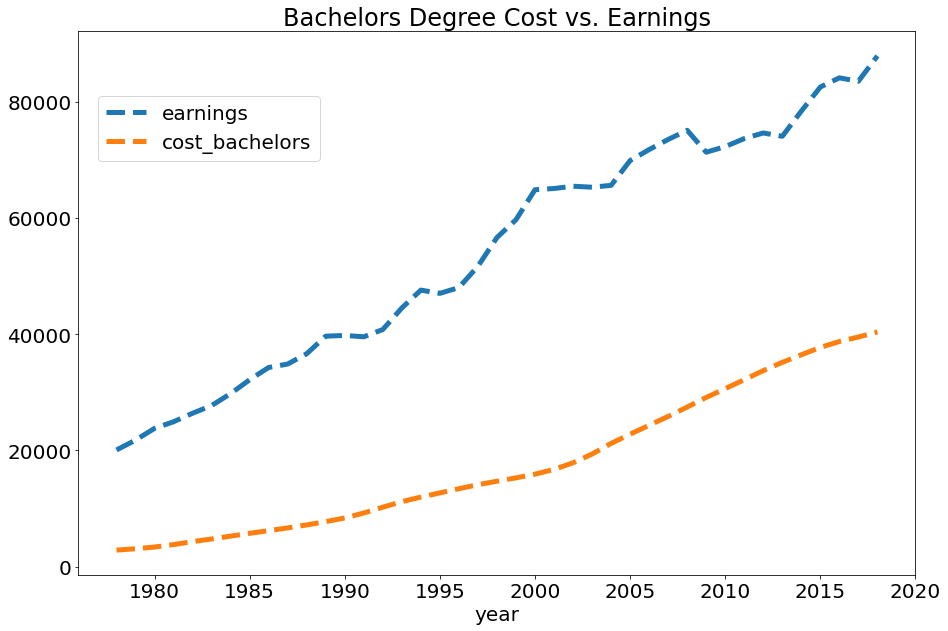

In [254]:
# plot bar graph showing Bachelor degree cost to earnings each year
plt.rcParams.update({'font.size': 20})
b_df.plot(kind='line', linestyle='dashed', linewidth=5, figsize=(15,10),
               title='Bachelors Degree Cost vs. Earnings').legend(bbox_to_anchor=(0.3, 0.9))


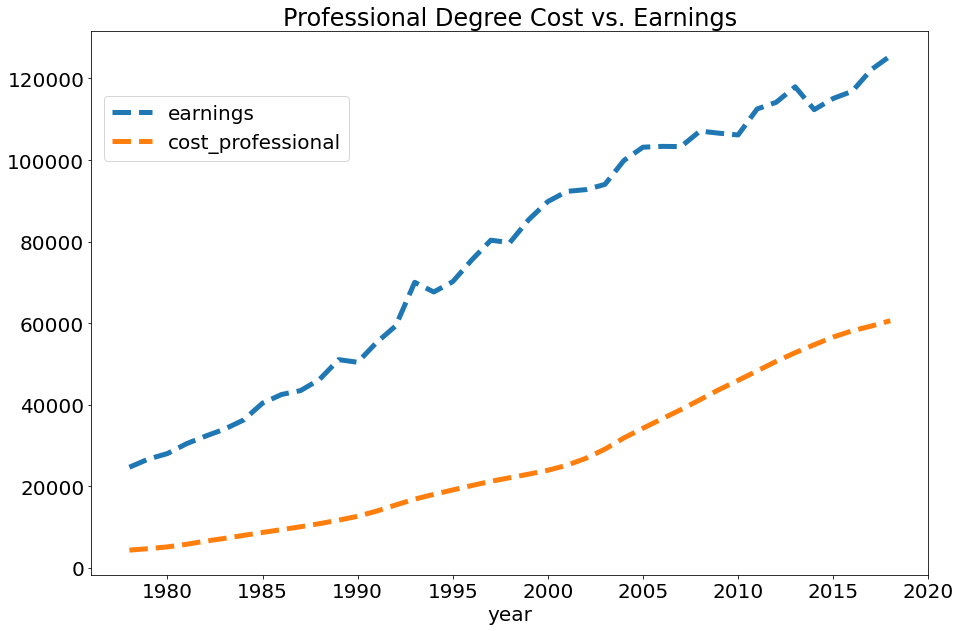

In [256]:
# plot bar graph showing Professional degree cost to earnings each year
plt.rcParams.update({'font.size': 20})
p_df.plot(kind='line', linestyle='dashed', linewidth=5, figsize=(15,10),
               title='Professional Degree Cost vs. Earnings').legend(bbox_to_anchor=(0.32, 0.9))
